**Mount google drive**

In [336]:
# from google.colab import drive
# drive.mount('/content/drive')

**Import the required libraries**

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Ignore all warnings
warnings.filterwarnings("ignore")

In [338]:
df = pd.read_csv('../data/processed_data/trip_riders_drivers_df.csv')

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_id             200000 non-null  object 
 1   user_id             200000 non-null  object 
 2   driver_id           200000 non-null  object 
 3   fare                200000 non-null  float64
 4   surge_multiplier    200000 non-null  float64
 5   tip                 200000 non-null  float64
 6   payment_type        200000 non-null  object 
 7   pickup_time         200000 non-null  object 
 8   dropoff_time        200000 non-null  object 
 9   pickup_lat          200000 non-null  float64
 10  pickup_lng          200000 non-null  float64
 11  dropoff_lat         200000 non-null  float64
 12  dropoff_lng         200000 non-null  float64
 13  weather             200000 non-null  object 
 14  loyalty_status      200000 non-null  object 
 15  user_signup_date    200000 non-nul

**columns data types conversion**

In [340]:
# Convert pickup and dropoff times safely, keeping timezone info
df['pickup_time'] = pd.to_datetime(df['pickup_time'], utc=True, errors='coerce')
df['dropoff_time'] = pd.to_datetime(df['dropoff_time'], utc=True, errors='coerce')
df['user_signup_date'] = pd.to_datetime(df['user_signup_date'], utc=True, errors='coerce')
df['driver_signup_date'] = pd.to_datetime(df['driver_signup_date'], utc=True, errors='coerce')
df['last_active'] = pd.to_datetime(df['last_active'], utc=True, errors='coerce')
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'], utc=True, errors='coerce')



# Check the datatypes
print(df['pickup_time'].dtype)
print(df['dropoff_time'].dtype)
print(df['user_signup_date'].dtype)
print(df['driver_signup_date'].dtype)

datetime64[ns, UTC]
datetime64[ns, UTC]
datetime64[ns, UTC]
datetime64[ns, UTC]


# **Revenue**

In [341]:
df['revenue'] = (df['fare']*df['surge_multiplier']) + df['tip']
df['revenue'].head(2)

0     5.07
1    20.13
Name: revenue, dtype: float64

In [342]:
total_rev_by_city = df.groupby('city')['revenue'].sum()
total_trips_by_city = df.groupby('city')['trip_id'].count()

### **Total Revenue by City**

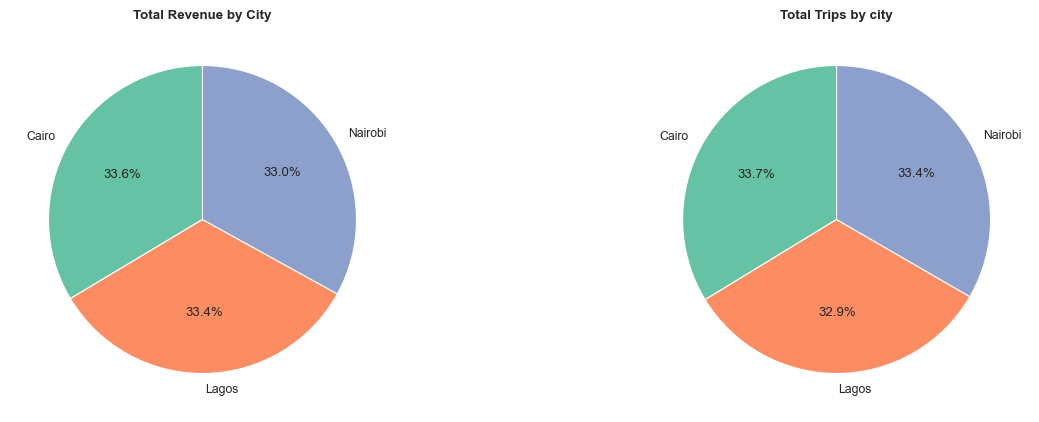

In [343]:
plt.figure(figsize=(15,5))
sns.set(style='darkgrid', palette='Set2', context='paper')
plt.subplot(1,2,1)
plt.pie(
    total_rev_by_city.values,
    labels=total_rev_by_city.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Total Revenue by City', weight='bold')

plt.subplot(1,2,2)
plt.pie(
    total_trips_by_city.values,
    labels = total_trips_by_city.index,
    autopct='%1.1f%%',
    startangle=90
    
)
plt.title('Total Trips by city', weight='bold')
plt.show();


**Total Revenue by City**
- Revenue is almost evenly split across Cairo, Lagos, and Nairobi, with only marginal differences.
- Cairo leads slightly, but all three cities contribute roughly one‑third each.

**Total Trips by City**
- Trip volumes are also nearly identical across the three cities.
- Nairobi edges slightly ahead, but the variation is minimal.

---

### **Top 10 Revenue‑Generating Drivers**

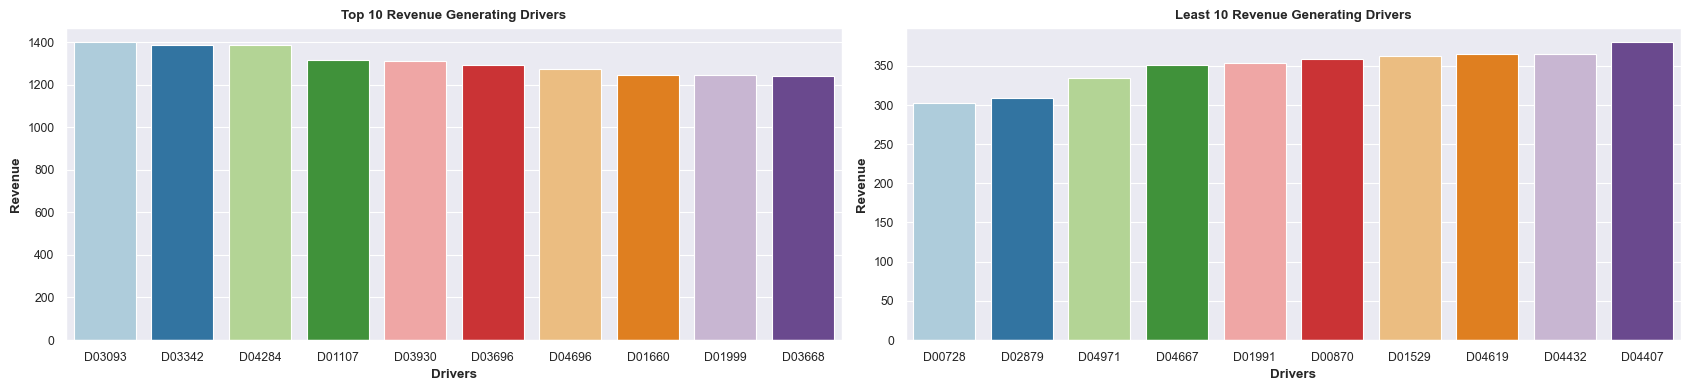

In [344]:
total_rev_by_driver = df.groupby('driver_id')['revenue'].sum().reset_index()
top_10_driver_by_rev = total_rev_by_driver.sort_values('revenue', ascending=False).head(10)
least_10_driver_by_rev = df.groupby('driver_id')['revenue'].sum().reset_index()
least_10_driver_by_rev = least_10_driver_by_rev.sort_values('revenue', ascending=True).head(10)
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
sns.barplot(x='driver_id', y='revenue', data=top_10_driver_by_rev, palette='Paired')
plt.title('Top 10 Revenue Generating Drivers', weight='bold')
plt.xlabel('Drivers',weight='bold')
plt.ylabel('Revenue',weight='bold')

plt.subplot(1,2,2)
sns.barplot(x='driver_id', y='revenue', data=least_10_driver_by_rev, palette='Paired')
plt.title('Least 10 Revenue Generating Drivers', weight='bold')
plt.xlabel('Drivers',weight='bold')
plt.ylabel('Revenue',weight='bold')
plt.tight_layout()
plt.show();

**Top 10 Revenue‑Generating Drivers**

- The top drivers all generate high and fairly similar revenue levels, clustered just below the 1400 mark.
- These drivers consistently outperform the rest of the fleet, indicating strong productivity or favourable trip patterns.

**Least 10 Revenue‑Generating Drivers**
- The lowest‑earning drivers generate significantly less revenue, all sitting below the 350 mark.
- Their performance is far below the fleet average, suggesting low activity, fewer trips, or operational challenges.

---

**Recommendations**
- The gap between the top‑earning and lowest‑earning drivers is very wide.
- This imbalance suggests an opportunity to uplift low performers through targeted support, training, or better trip allocation.

---

### **Revenue by period of day and Season**

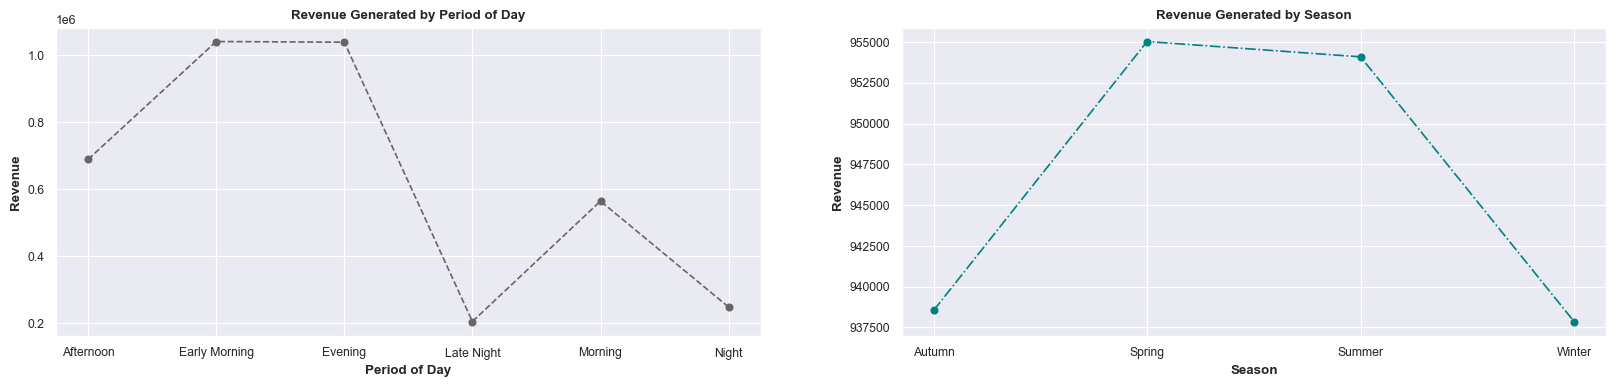

In [345]:
plt.figure(figsize=(20,4))
#Plotting the revenue by period of day
plt.subplot(1,2,1)
rev_by_period_of_day = df.groupby('pickup_period')['revenue'].sum().reset_index()
plt.plot(rev_by_period_of_day['pickup_period'], rev_by_period_of_day['revenue'], marker='o', linestyle='--', color='0.4')
plt.title('Revenue Generated by Period of Day', weight='bold')
plt.xlabel('Period of Day', weight='bold')
plt.ylabel('Revenue',weight='bold')

#plotting the revenue by season
plt.subplot(1,2,2)
rev_by_season = df.groupby('pickup_season')['revenue'].sum().reset_index()
plt.plot(rev_by_season['pickup_season'], rev_by_season['revenue'], marker='o', linestyle='-.', color='teal', )
plt.title('Revenue Generated by Season',weight='bold')
plt.xlabel('Season',weight='bold')
plt.ylabel('Revenue',weight='bold')
plt.show();

**Revenue Generated by Period of Day**

- Early Morning and Evening produce the highest revenue, showing strong demand during these times.
- Late Night and Night generate the lowest revenue, indicating weaker activity in those periods.

**Revenue Generated by Season**

- Spring delivers the highest revenue, with Summer close behind.
- Winter shows the lowest revenue, suggesting reduced seasonal demand.

---

### **Revenue Distribution Across Rider Age Groups**

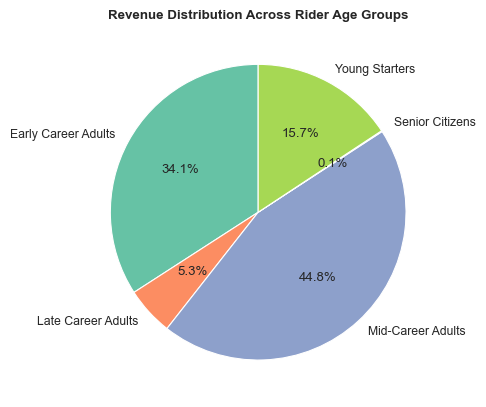

In [346]:
rev_by_rider_age_grp = df.groupby('rider_age_group')['revenue'].sum()
plt.pie(rev_by_rider_age_grp.values,
        labels=rev_by_rider_age_grp.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Revenue Distribution Across Rider Age Groups',weight='bold')
plt.show();

**Revenue Distribution Across Rider Age Groups**

- Mid‑Career and Early‑Career Adults contribute the bulk of total revenue, making up nearly 80% combined.
- Senior Citizens and Late‑Career Adults contribute very little, with Senior Citizens representing almost none of the revenue.

---

### **Revenue Distribution by Rider Loyalty Status**

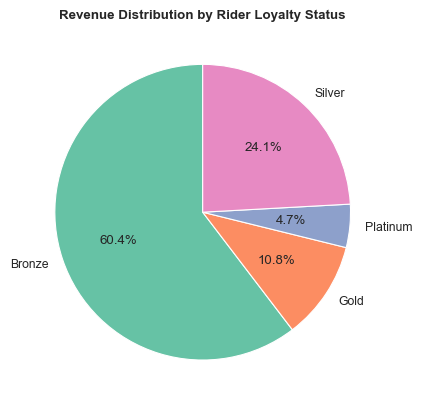

In [347]:
rev_by_rider_loyalty_status = df.groupby('loyalty_status')['revenue'].sum()
plt.pie(rev_by_rider_loyalty_status.values,
        labels=rev_by_rider_loyalty_status.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Revenue Distribution by Rider Loyalty Status',weight='bold')
plt.show();

**Revenue Distribution by Rider Loyalty Status**

- Bronze riders contribute the majority of revenue, making up over half of total earnings.
- Platinum and Gold riders contribute far less, with Platinum representing the smallest share.

---

### **Yearly Revenue**

In [348]:
trips_by_year = df.groupby('pickup_year')['trip_id'].count().reset_index()
trips_by_year

,pickup_year,trip_id
0,2024,136031
1,2025,63969


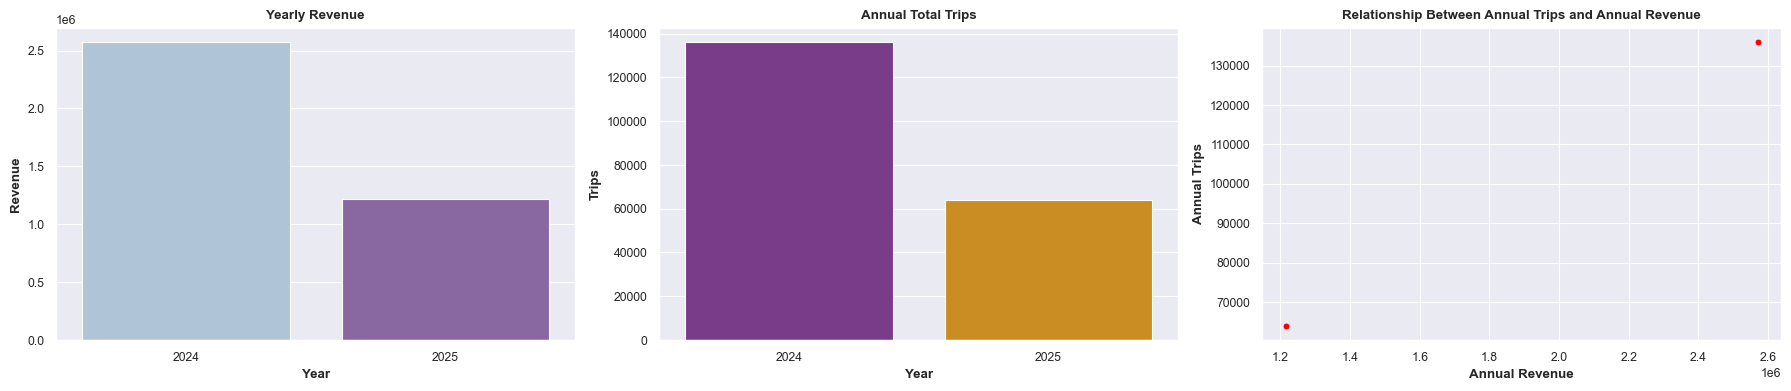

In [349]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
rev_by_year = df.groupby('pickup_year')['revenue'].sum().reset_index()
trips_by_year = df.groupby('pickup_year')['trip_id'].count().reset_index()
sns.barplot(x='pickup_year', y='revenue', data=rev_by_year, palette='BuPu')
plt.title('Yearly Revenue', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('Revenue', weight='bold')

plt.subplot(1,3,2)
sns.barplot(x='pickup_year', y='trip_id',data=trips_by_year, palette='CMRmap')
plt.title('Annual Total Trips', weight='bold')
plt.xlabel('Year', weight='bold')
plt.ylabel('Trips', weight='bold')

plt.subplot(1,3,3)
sns.scatterplot(x=rev_by_year['revenue'], y=trips_by_year['trip_id'], marker='o', color='red')
plt.title('Relationship Between Annual Trips and Annual Revenue',weight='bold')
plt.xlabel('Annual Revenue',weight='bold')
plt.ylabel('Annual Trips',weight='bold')
plt.tight_layout()
plt.show();

**Yearly Revenue**

- Revenue dropped sharply from 2024 to 2025.
- The decline is roughly a 50% reduction year‑over‑year.

**Annual Total Trip**

- Trip volume also fell significantly between 2024 and 2025.
- The drop in trips mirrors the same downward pattern seen in revenue.

**Relationship Between Annual Trips and Annual Revenue**

- Higher annual trips are associated with higher annual revenue.
- The two years form a clear positive relationship: fewer trips is proportional to lower revenue.

---

### **Revenue by Vehicle type**

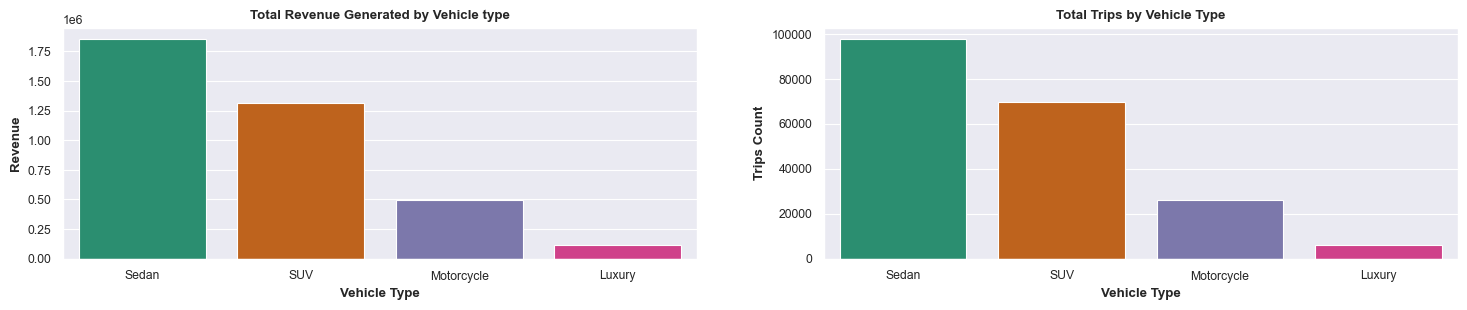

In [350]:
rev_by_vehicle_type = df.groupby('vehicle_type')['revenue'].sum().reset_index()
rev_by_vehicle_type = rev_by_vehicle_type.sort_values('revenue', ascending=False)
trips_by_vehicle_type = df.groupby('vehicle_type')['trip_id'].count().reset_index()
trips_by_vehicle_type = trips_by_vehicle_type.sort_values('trip_id', ascending=False)
plt.figure(figsize=(18,3))
plt.subplot(1,2,1)
sns.barplot(x= 'vehicle_type', y= 'revenue', data= rev_by_vehicle_type, palette= 'Dark2')
plt.title('Total Revenue Generated by Vehicle type',weight='bold')
plt.xlabel('Vehicle Type',weight='bold')
plt.ylabel('Revenue',weight='bold')

plt.subplot(1,2,2)
sns.barplot(x='vehicle_type', y='trip_id', data= trips_by_vehicle_type, palette= 'Dark2')
plt.title('Total Trips by Vehicle Type', weight='bold')
plt.xlabel('Vehicle Type',weight='bold')
plt.ylabel('Trips Count',weight='bold')
plt.show();

**Total Revenue by Vehicle Type** 
- Sedans generate the highest revenue, followed by SUVs and Motorcycles.
- Luxury vehicles contribute the least revenue overall.

**Total Trips by Vehicle Type** 
- Sedans record the highest number of trips, with SUVs and Motorcycles trailing behind.
- Luxury vehicles have the lowest trip count.

**Obviously, higher trip volume clearly aligns with higher revenue, suggesting usage frequency is the main driver of earnings.**

---

### **Relationship Between Rider Rating and Likelihood of Churn**

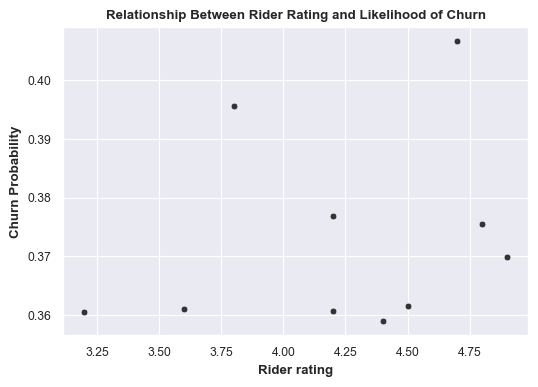

In [351]:
plt.figure(figsize=(6,4))
driver_rating_churn = df.groupby('driver_id')[['rating_by_rider','churn_prob']].mean().reset_index()
driver_rating_churn = driver_rating_churn.sort_values('churn_prob', ascending=False).head(10)
sns.scatterplot(x='rating_by_rider',y='churn_prob', data=driver_rating_churn, color='0.2')
plt.title('Relationship Between Rider Rating and Likelihood of Churn',weight='bold')
plt.xlabel('Rider rating',weight='bold')
plt.ylabel('Churn Probability',weight='bold')
plt.show();

#

## **The Impact of Weather on Ride Fare**

**Average Surge Multiplier by Weather Condition and Average Fare by Weather Condition**

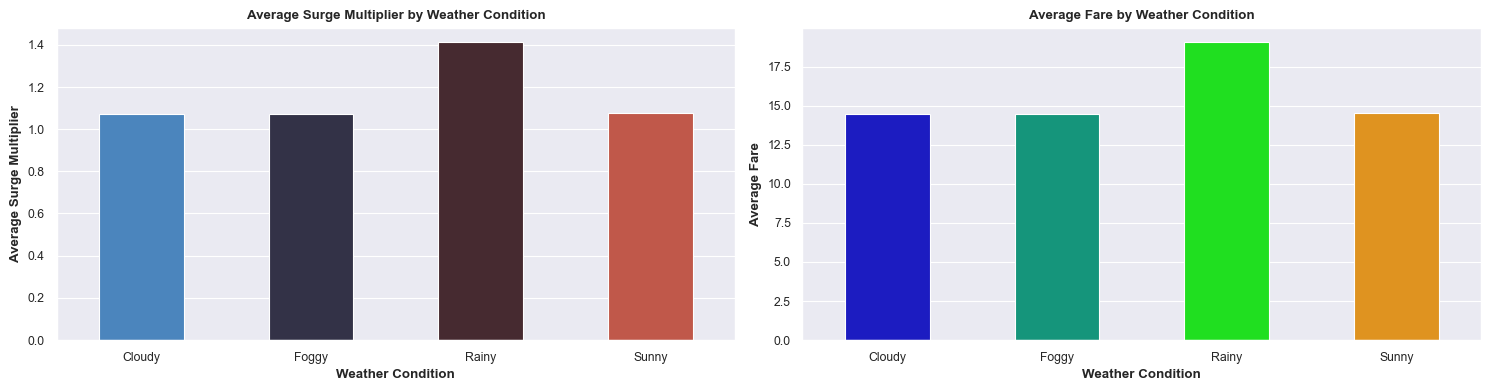

In [352]:
plt.figure(figsize=(15, 4))
weather_surge = df.groupby('weather')['surge_multiplier'].mean().reset_index()
weather_fare = df.groupby('weather')['fare'].mean().reset_index()
plt.subplot(1, 2, 1)
sns.barplot(x='weather', y='surge_multiplier', data=weather_surge, palette='icefire', width=0.5)
plt.xlabel('Weather Condition', weight='bold')
plt.ylabel('Average Surge Multiplier', weight='bold')
plt.title('Average Surge Multiplier by Weather Condition', weight='bold')

plt.subplot(1, 2, 2)
sns.barplot(x='weather', y='fare', data=weather_fare, palette='nipy_spectral', width=0.5)
plt.title('Average Fare by Weather Condition', weight='bold')
plt.xlabel('Weather Condition', weight='bold')
plt.ylabel('Average Fare', weight='bold')
plt.tight_layout()
plt.show();

**Average Surge Multiplier by Weather Condition**

- Surge pricing is highest during rainy weather, indicating stronger demand or reduced driver availability.
- Cloudy and foggy conditions show the lowest surge levels, suggesting relatively stable supply–demand balance.

**Average Fare by Weather Condition**
- Rainy weather leads to the highest average fares, aligning with the elevated surge multiplier.
- Other weather conditions (sunny, cloudy, foggy) have similar fare levels, showing minimal variation outside rain.

---

In [353]:
df.columns

Index(['trip_id', 'user_id', 'driver_id', 'fare', 'surge_multiplier', 'tip',
       'payment_type', 'pickup_time', 'dropoff_time', 'pickup_lat',
       'pickup_lng', 'dropoff_lat', 'dropoff_lng', 'weather', 'loyalty_status',
       'user_signup_date', 'age', 'rating_by_driver', 'churn_prob',
       'rating_by_rider', 'vehicle_type', 'driver_signup_date', 'last_active',
       'city', 'acceptance_rate', 'dropoff_date', 'dropoff_day',
       'trip_duration_mins', 'rider_age_group', 'pickup_hour', 'pickup_date',
       'pickup_day', 'pickup_month', 'pickup_year', 'pickup_period',
       'pickup_season', 'revenue'],
      dtype='object')

**Rider Ratings vs. Driver Ratings per City**

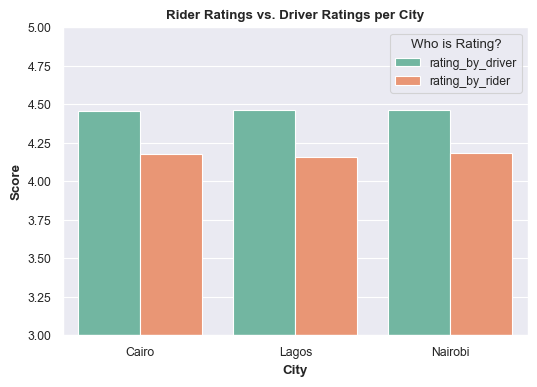

In [354]:
gap_data = df.groupby('city')[['rating_by_driver', 'rating_by_rider']].mean().reset_index()
gap_melted = gap_data.melt(id_vars='city', var_name='Who is Rating?', value_name='Score')
plt.figure(figsize=(6,4))
sns.barplot(data=gap_melted, x='city', y='Score', hue='Who is Rating?')
plt.ylim(3, 5) # Focus on the top of the scale
plt.title('Rider Ratings vs. Driver Ratings per City', weight='bold')
plt.xlabel('City',weight='bold')
plt.ylabel('Score',weight='bold')
plt.show()

- Drivers consistently give higher ratings than riders across all three cities.
- The gap suggests riders are slightly more critical in their evaluations compared to drivers.

---

#### **Surge Elasticity (Price Sensitivity per City):** Looking at how fare changes as surge_multiplier increases in each city.

In [ ]:
sns.lmplot(data=df, x='surge_multiplier', y='fare', hue='city', scatter_kws={'alpha':0.5})
plt.title('Fare Elasticity: How Surge affects Price by City', weight='bold')
plt.xlabel('Surge Multiplier',weight='bold')
plt.ylabel('Fare',weight='bold')
plt.show();

**Fare Elasticity: How Surge Affects Price by City**

- Fares increase as the surge multiplier rises, showing a clear positive relationship.
- All cities follow the same upward trend, though each shows slightly different fare levels at similar surge values.

---

#

**Revenue Leakage (Lost Fares from Low Acceptance):**
- *Estimating the total revenue if all drivers had a 100% acceptance rate.*

In [ ]:
df['potential_fare'] = df['fare'] / df['acceptance_rate']                 # engineering the 'potential_fare' feature
leakage = df.groupby('city')[['fare', 'potential_fare']].sum().reset_index()
leakage['lost_revenue'] = leakage['potential_fare'] - leakage['fare']
sns.barplot(data=leakage, x='city', y='lost_revenue', palette='Dark2')
plt.title('Estimated Revenue Leakage due to Low Acceptance', weight='bold')
plt.xlabel('City', weight='bold')
plt.ylabel('Revenue Loss', weight='bold')
plt.show();

**Estimated Revenue Leakage due to Low Acceptance**
- All three cities experience substantial revenue loss, with Cairo and Lagos showing the highest leakage.
- Nairobi has slightly lower leakage but still reflects a significant financial impact from low acceptance rates.

---

## **Rider Retention and Churn Analysis**

**Drivers Rating by Churn Probability**

In [ ]:
driver_rating_churn = df.groupby('rating_by_driver')['churn_prob'].mean().reset_index()    # Grouping by rating to see average churn probability
sns.scatterplot(data=driver_rating_churn, x='rating_by_driver', y='churn_prob', color='green')
plt.title('Correlation between Driver Rating and Churn Probability', weight='bold')
plt.xlabel('Rating by Drivers', weight='bold')
plt.ylabel('Churn Probability', weight='bold')
plt.show();

- Lower driver ratings are associated with higher churn probability, indicating a negative relationship.
- As ratings improve, churn probability generally decreases, suggesting satisfaction plays a role in retention.

---

**Riders Rating by Churn Probability**

In [ ]:
rider_rating_churn = df.groupby('rating_by_rider')['churn_prob'].mean().reset_index()   # Grouping by rating to see average churn probability
sns.scatterplot(data=rider_rating_churn, x='rating_by_rider', y='churn_prob', color='red')
plt.title('Correlation between Rider Rating and Churn Probability', weight='bold')
plt.xlabel('Rating by Riders', weight='bold')
plt.ylabel('Churn Probability', weight='bold')
plt.show();

- Lower rider ratings are linked with higher churn probability, showing a negative relationship.
- As rider ratings increase, churn probability generally declines, suggesting better‑rated riders are less likely to churn.

---

#

#### **Weather by Driver Acceptance Rate**
- *Does weather decrease acceptance rates?*

In [ ]:
weather_perf = df.groupby('weather')['acceptance_rate'].mean()
weather_perf.plot(kind='bar', color='skyblue')
plt.title('Average Driver Acceptance Rate by Weather',weight='bold')
plt.xlabel('Weather', weight='bold')
plt.xticks(rotation=False)
plt.show();

**Average Driver Acceptance Rate by Weather**
- Acceptance rates remain fairly consistent across all weather types, with only slight variation.
- No single weather condition shows a dramatic drop or spike, suggesting weather has limited impact on acceptance behaviour.

---

In [ ]:
df.to_csv('C:/Users/User/Desktop/ridewise/data/processed_data/trip_riders_drivers_eda_df.csv', index=False)
print('The dataframe was saved successfully')